In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [3]:
house_df = pd.read_csv(r'C:\Users\Dell\Downloads\DataSet-2020\DataSet\Pune_House_Data.csv')
house_df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


In [4]:
house_df.shape

(13320, 9)

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
house_df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

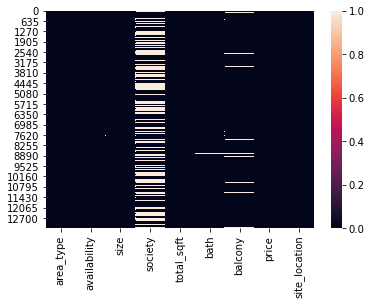

In [7]:
sns.heatmap(house_df.isnull())

In [8]:
house_df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

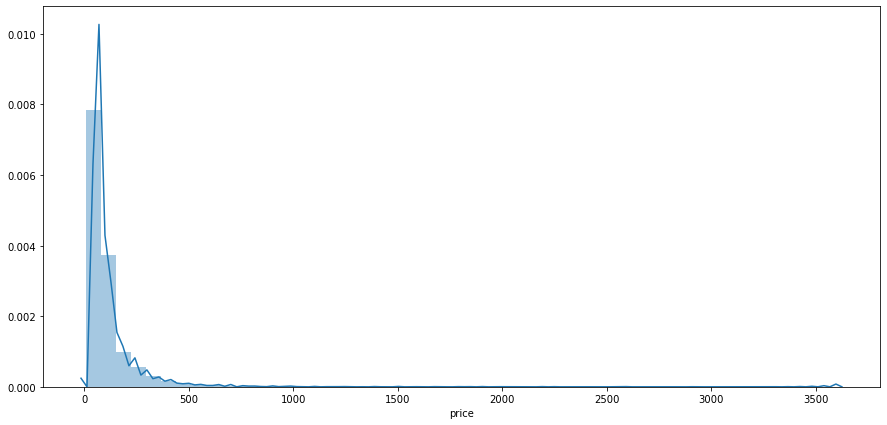

In [9]:
plt.figure(figsize=(15,7)) 
sns.distplot(house_df['price']) 
plt.show()

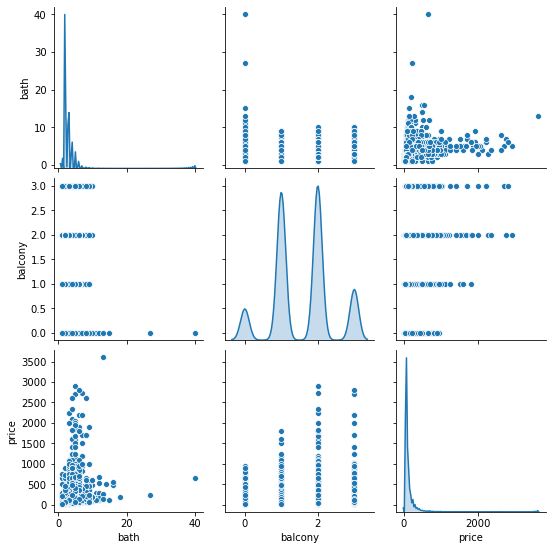

In [10]:
sns.pairplot(house_df, diag_kind='kde')

In [11]:
house_df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


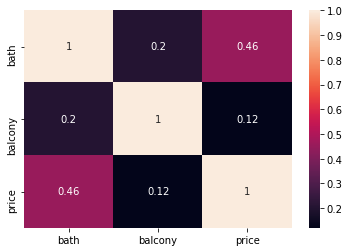

In [12]:
sns.heatmap(house_df.corr(), annot=True)

In [13]:
# Filling Misssing Values
# for all object type missing values, impute mode of corresponding column
for column in ['site_location', 'size']:
    house_df[column].fillna(house_df[column].mode()[0], inplace = True)

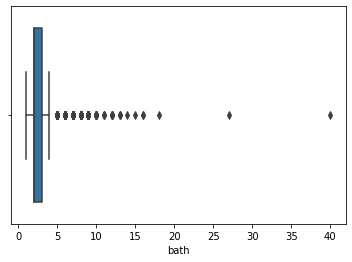

In [14]:
# fill numerical values
#plt.figure(figsize=(5,5))
sns.boxplot(house_df.bath)
plt.show()

In [15]:
# bath column has outliers, treat with median value imputation
house_df['bath'].fillna(house_df['bath'].median(), inplace = True)

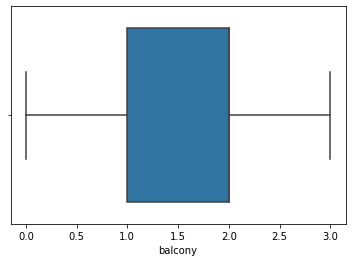

In [16]:
sns.boxplot(house_df.balcony)
plt.show()

In [17]:
# no outiers in balcony, so treat missing values with mean value imputation
house_df['balcony'].fillna(house_df['balcony'].mean(), inplace = True)

In [18]:
house_df.drop('society', axis=1, inplace=True)

In [19]:
house_df.isnull().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

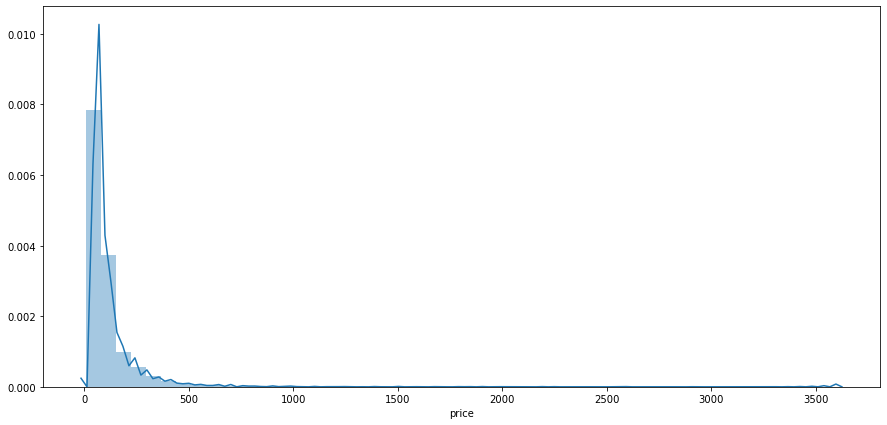

In [20]:
plt.figure(figsize=(15,7)) 
sns.distplot(house_df['price']) 
plt.show()

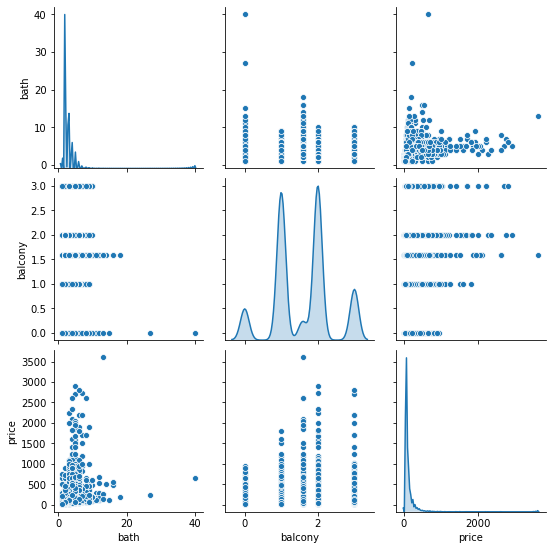

In [21]:
sns.pairplot(house_df, diag_kind='kde')

In [22]:
house_df['bhk_size'] = house_df['size'].apply(lambda x: int(x.split()[0]))
house_df.drop('size', axis = 1, inplace = True)
# house_df.groupby('bhk_size')['bhk_size'].agg('count')
house_df['bhk_size'].value_counts()

2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
14       1
43       1
18       1
12       1
13       1
16       1
19       1
Name: bhk_size, dtype: int64

In [23]:
house_df.head(3)

,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk_size
0,Super built-up Area,19-Dec,1056,2.0,1.0,39.07,Alandi Road,2
1,Plot Area,Ready To Move,2600,5.0,3.0,120.00,Ambegaon Budruk,4
2,Built-up Area,Ready To Move,1440,2.0,3.0,62.00,Anandnagar,3


In [24]:
house_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
# Since the total_sqft contains range values such as 1133-1384, lets filter out these values
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
# Displaying all the rows that are not integers
house_df[~house_df['total_sqft'].apply(isFloat)]


,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk_size
30,Super built-up Area,19-Dec,2100 - 2850,4.0,0.000000,186.000,Gultekdi,4
56,Built-up Area,20-Feb,3010 - 3410,2.0,1.584376,192.000,Model colony,4
81,Built-up Area,18-Oct,2957 - 3450,2.0,1.584376,224.500,Shukrawar Peth,4
122,Super built-up Area,18-Mar,3067 - 8156,4.0,0.000000,477.000,Ganeshkhind,4
137,Super built-up Area,19-Mar,1042 - 1105,2.0,0.000000,54.005,Khadaki,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,1804 - 2273,3.0,0.000000,122.000,Gokhale Nagar,3
13059,Super built-up Area,Ready To Move,1200 - 1470,2.0,0.000000,72.760,Anandnagar,2
13240,Super built-up Area,Ready To Move,1020 - 1130,2.0,1.584376,52.570,Vadgaon Budruk,1
13265,Super built-up Area,20-Sep,1133 - 1384,2.0,0.000000,59.135,Dapodi,2


In [27]:
# Converting the range values to integer values and removing other types of error
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
house_df['new_total_sqft'] = house_df['total_sqft'].apply(convert_sqft_to_num)
house_df = house_df.drop('total_sqft', axis=1)
house_df

,area_type,availability,bath,balcony,price,site_location,bhk_size,new_total_sqft
0,Super built-up Area,19-Dec,2.0,1.000000,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,5.0,3.000000,120.00,Ambegaon Budruk,4,2600.0
2,Built-up Area,Ready To Move,2.0,3.000000,62.00,Anandnagar,3,1440.0
3,Super built-up Area,Ready To Move,3.0,1.000000,95.00,Aundh,3,1521.0
4,Super built-up Area,Ready To Move,2.0,1.000000,51.00,Aundh Road,2,1200.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,4.0,0.000000,231.00,Pashan,5,3453.0
13316,Super built-up Area,Ready To Move,5.0,1.584376,400.00,Paud Road,4,3600.0
13317,Built-up Area,Ready To Move,2.0,1.000000,60.00,Pirangut,2,1141.0
13318,Super built-up Area,18-Jun,4.0,1.000000,488.00,Prabhat Road,4,4689.0


In [29]:
house_df.dtypes

area_type          object
availability       object
bath              float64
balcony           float64
price             float64
site_location      object
bhk_size            int64
new_total_sqft    float64
dtype: object

In [30]:
# house_df1 = house_df.copy()
# for index in new_df.index:
#     if index in house_df1.index:
#         house_df1.loc[index, 'total_sqft'] = new_df.loc[index, 'total_sqft']
# house_df1.head()

In [31]:
print(house_df['new_total_sqft'].unique())

[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


In [32]:
locations_count = house_df['site_location'].value_counts(ascending=True)
locations_count

other              1
Salunke Vihar    138
Rasta Peth       138
Tilak Road       138
Shivaji Nagar    138
                ... 
Hingne Khurd     139
Market yard      139
Khadki           139
Baner road       139
Alandi Road      140
Name: site_location, Length: 97, dtype: int64

In [33]:
# scaling
# change price in lacs to price_per_sqft
house_df1 = house_df.copy()

# In our dataset the price column is in Lakhs
# price in lakhs = total_sqft * price_per_sqft
# thus price_per_sqft = price in lakhs/total_sqft

house_df1['price_per_sqft'] = (house_df1['price']*100000)/house_df1['new_total_sqft']
#house_df1.drop('price', axis = 1, inplace = True)
house_df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk_size,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


## Remove Outliers 

In [34]:
# Removing the rows that have 1 Room for less than 300sqft
house_df1[house_df1.new_total_sqft/house_df1.bhk_size<300].head()

,area_type,availability,bath,balcony,price,site_location,bhk_size,new_total_sqft,price_per_sqft
9,Plot Area,Ready To Move,6.0,1.584376,370.0,Bhavani Peth,6,1020.0,36274.509804
45,Plot Area,Ready To Move,9.0,1.584376,200.0,Kondhwa Budruk,8,600.0,33333.333333
58,Plot Area,Ready To Move,4.0,1.000000,150.0,Mundhawa,6,1407.0,10660.980810
68,Plot Area,Ready To Move,7.0,0.000000,85.0,Pirangut,8,1350.0,6296.296296
70,Plot Area,Ready To Move,3.0,2.000000,100.0,Pune Railway Station,3,500.0,20000.000000


In [35]:
df = house_df1[~(house_df1.new_total_sqft/house_df1.bhk_size<300)]
df.shape

(12576, 9)

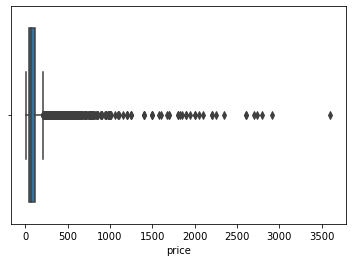

In [36]:
sns.boxplot(df['price'])

In [37]:
#Outlier Removal Using Standard Deviation and Mean
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(df)
df2.shape

(10945, 9)

In [39]:
df.columns

Index(['area_type', 'availability', 'bath', 'balcony', 'price',
       'site_location', 'bhk_size', 'new_total_sqft', 'price_per_sqft'],
      dtype='object')

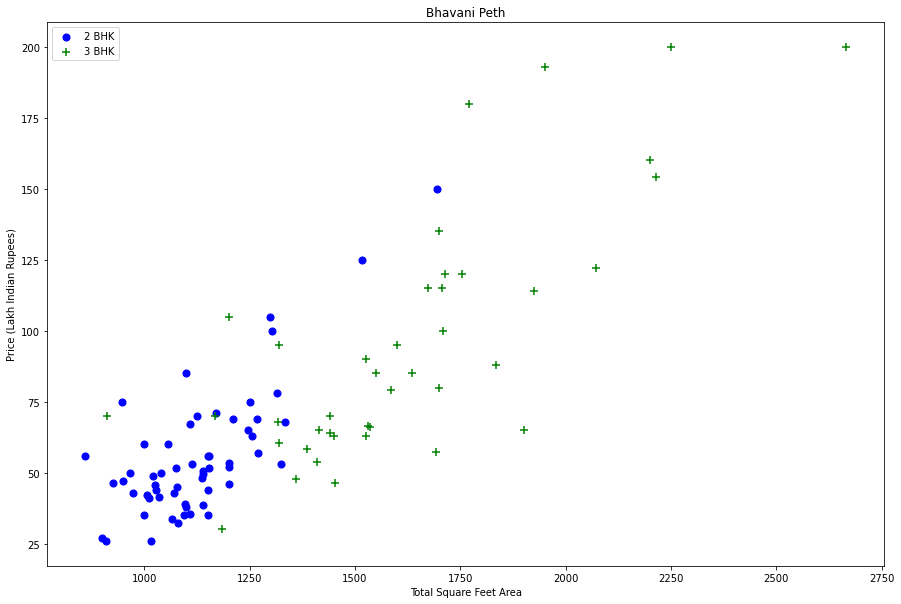

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location) & (df.bhk_size==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk_size==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.new_total_sqft, bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df2,"Bhavani Peth")


In [41]:
#Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft 
#of 1 BHK apartment

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk_size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk_size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                #print(bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df3 = remove_bhk_outliers(df2)
# df8 = df7.copy()
df3.shape

(7466, 9)

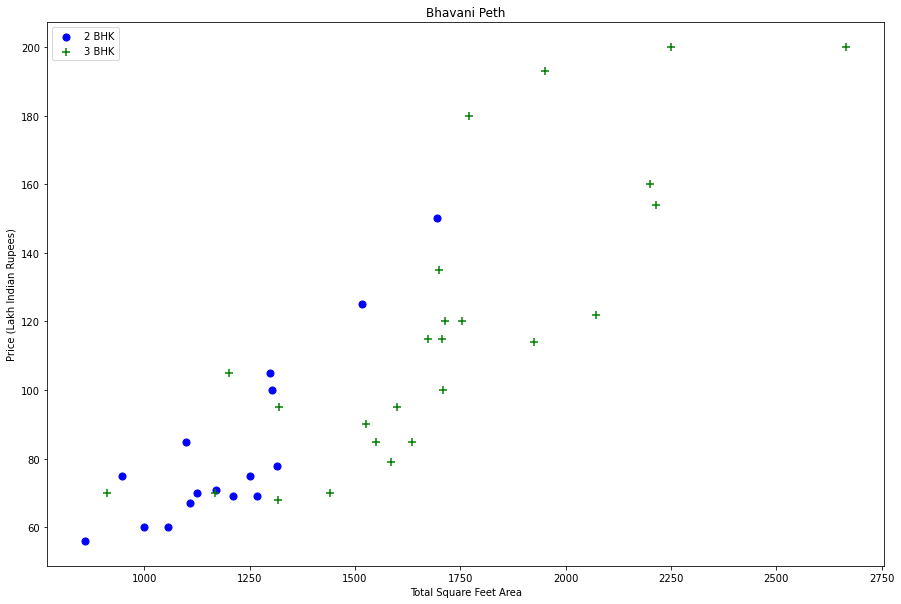

In [42]:
plot_scatter_chart(df3,"Bhavani Peth")

In [43]:
Outlier Removal Using Bathrooms Feature

SyntaxError: invalid syntax (<ipython-input-43-9d4f1450e856>, line 1)

Text(0, 0.5, 'Count')

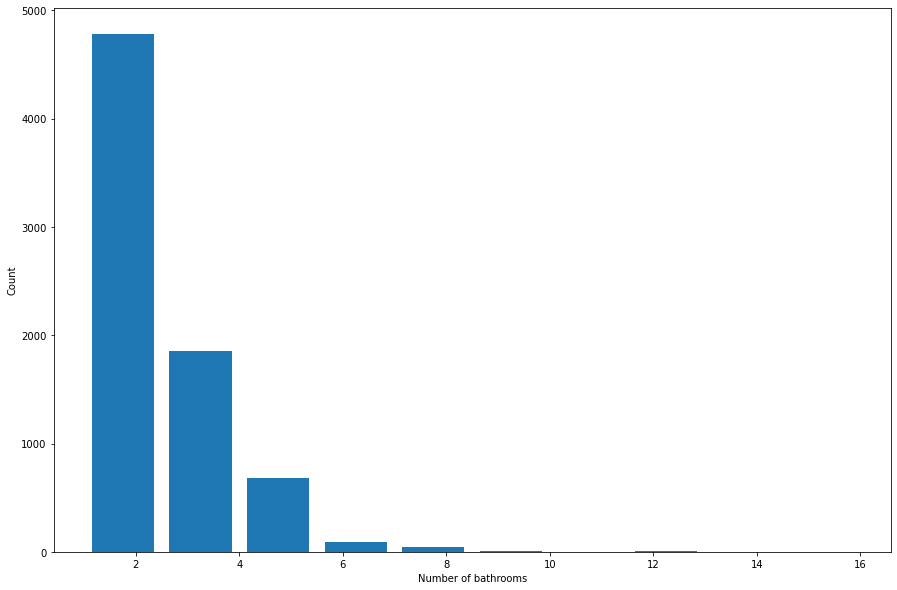

In [44]:
plt.hist(df3.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

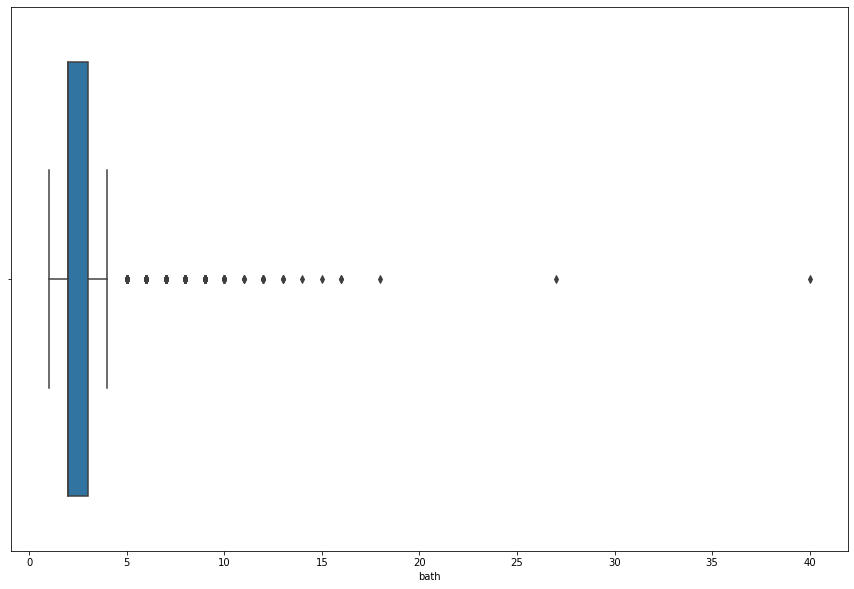

In [45]:
sns.boxplot(house_df['bath'])

In [46]:
df3[df3.bath>10]

,area_type,availability,bath,balcony,price,site_location,bhk_size,new_total_sqft,price_per_sqft
1218,Super built-up Area,Ready To Move,12.0,1.584376,150.0,Bibvewadi,11,6000.0,2500.000000
2651,Super built-up Area,Ready To Move,12.0,1.584376,525.0,Fatima Nagar,10,12000.0,4375.000000
5295,Super built-up Area,Ready To Move,13.0,0.000000,275.0,Kondhwa Khurd,13,5425.0,5069.124424
6389,Super built-up Area,Ready To Move,16.0,1.584376,550.0,Model colony,16,10000.0,5500.000000
10445,Super built-up Area,Ready To Move,12.0,1.584376,160.0,Wagholi,10,4000.0,4000.000000


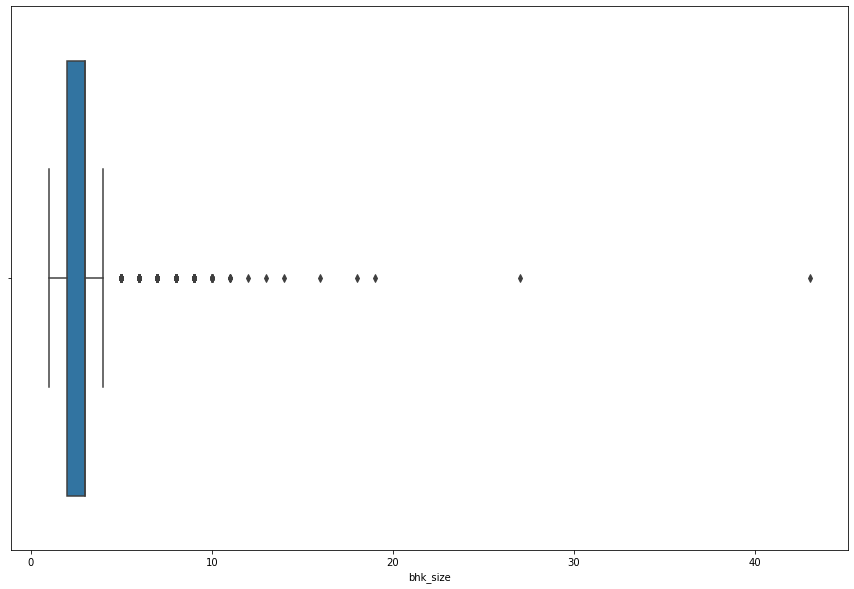

In [47]:
sns.boxplot(house_df['bhk_size'])

In [48]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home
df3[df3.bath > df3.bhk_size+2]

,area_type,availability,bath,balcony,price,site_location,bhk_size,new_total_sqft,price_per_sqft
777,Super built-up Area,Ready To Move,6.0,2.000000,116.0,Baner,3,1806.0,6423.034330
3086,Super built-up Area,Ready To Move,9.0,1.000000,1000.0,Ghorpade Peth,6,11338.0,8819.897689
4256,Built-up Area,Ready To Move,8.0,1.584376,450.0,Karve Nagar,4,7000.0,6428.571429


In [49]:
# the business manager has a conversation with you (i.e. a data scientist) that if you have
#4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, 
#you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

df3 = df3[df3.bath < df3.bhk_size+2]
df3.shape

(7401, 9)

In [50]:
df3.drop(['area_type','availability','price_per_sqft'], axis='columns', inplace=True)
df3.head()

,bath,balcony,price,site_location,bhk_size,new_total_sqft
0,2.0,1.0,39.07,Alandi Road,2,1056.0
1,4.0,1.0,245.00,Alandi Road,4,2894.0
2,2.0,2.0,50.00,Alandi Road,2,1084.0
3,2.0,2.0,80.00,Alandi Road,2,1230.0
4,3.0,2.0,130.00,Alandi Road,3,1750.0


In [51]:
df = df3.copy()

In [52]:
dummy_cols = pd.get_dummies(df.site_location)
df = pd.concat([df,dummy_cols], axis='columns')

In [53]:
df.drop(['site_location'], axis='columns', inplace=True)
df.head()

,bath,balcony,price,bhk_size,new_total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,2.0,1.0,39.07,2,1056.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1.0,245.00,4,2894.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,50.00,2,1084.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,80.00,2,1230.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,130.00,3,1750.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.shape

(7401, 101)

In [55]:
df.isna().sum()

bath              0
balcony           0
price             0
bhk_size          0
new_total_sqft    0
                 ..
Wagholi           0
Wakadewadi        0
Wanowrie          0
Warje             0
Yerawada          0
Length: 101, dtype: int64

In [56]:
# Splitting the dataset into features and label
x = df.drop('price', axis='columns')
y = df['price']

In [57]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression


In [58]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20)

In [59]:
# Creating Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [60]:
model.score(x_test, y_test)

0.8346578966711887

In [61]:
import pickle
with open ('pune_house_price_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [62]:
# Export location and column information to a file that will be useful later 
#on in our prediction application

import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("pune_columns.json","w") as f:
    f.write(json.dumps(columns))